# Candlesticks

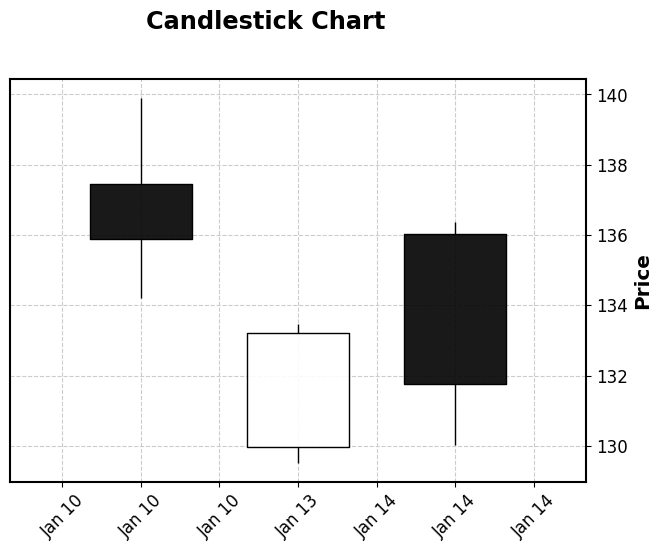

In [4]:
import mplfinance as mpf
import pandas as pd
import yfinance as yf
ticker = "NVDA"
data = yf.Ticker(ticker).history(start="2025-01-10", end="2025-01-15")
df = pd.DataFrame(data).dropna()
# mpf.plot(df, type='candle', style='charles', title='Candlestick Chart') # use this for green and red
mpf.plot(df, type='candle', style='classic', title='Candlestick Chart')


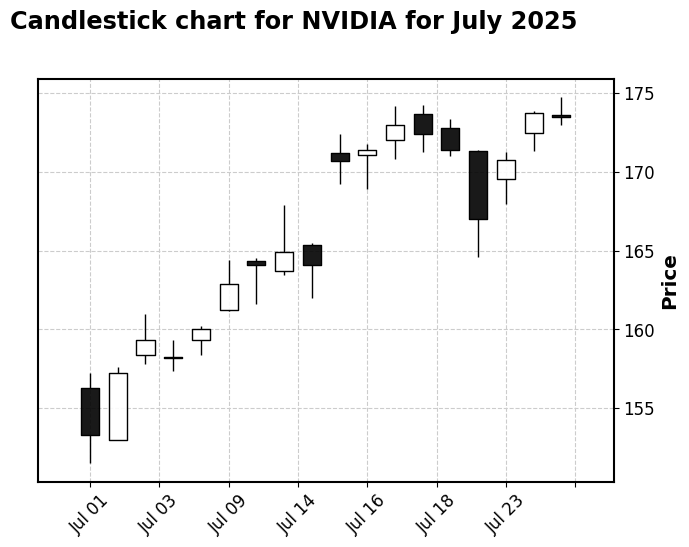

In [3]:
import mplfinance as mpf
import pandas as pd
import yfinance as yf
ticker = "NVDA"
data = yf.Ticker(ticker).history(start="2025-07-01", end="2025-07-27")
df = pd.DataFrame(data).dropna()
mpf.plot(df, type='candle', style='classic', title='Candlestick chart for NVIDIA for July 2025')

In [10]:
data = yf.Ticker("AAPL").history(start="2024-01-01", end="2024-02-01")

In [12]:
len(data)

21

# Listing 10.2 SMA and EMAs

In [35]:
price = [10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
#price = [1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900]
import pandas as pd

data = {
    "Date": pd.date_range(start="2023-01-01", periods=10),
    "Price": price,
}
df = pd.DataFrame(data)

window_size = 3
df['SMA'] = df['Price'].rolling(
    window=window_size).mean()    #A
df['EMA'] = df['Price'].ewm(
    span=window_size, adjust=False).mean()    #B


In [36]:
df

Date  Price     SMA          EMA
0 2023-01-01   1000     NaN  1000.000000
1 2023-01-02   1100     NaN  1050.000000
2 2023-01-03   1200  1100.0  1125.000000
3 2023-01-04   1300  1200.0  1212.500000
4 2023-01-05   1400  1300.0  1306.250000
5 2023-01-06   1500  1400.0  1403.125000
6 2023-01-07   1600  1500.0  1501.562500
7 2023-01-08   1700  1600.0  1600.781250
8 2023-01-09   1800  1700.0  1700.390625
9 2023-01-10   1900  1800.0  1800.195312

### Listing 10.3

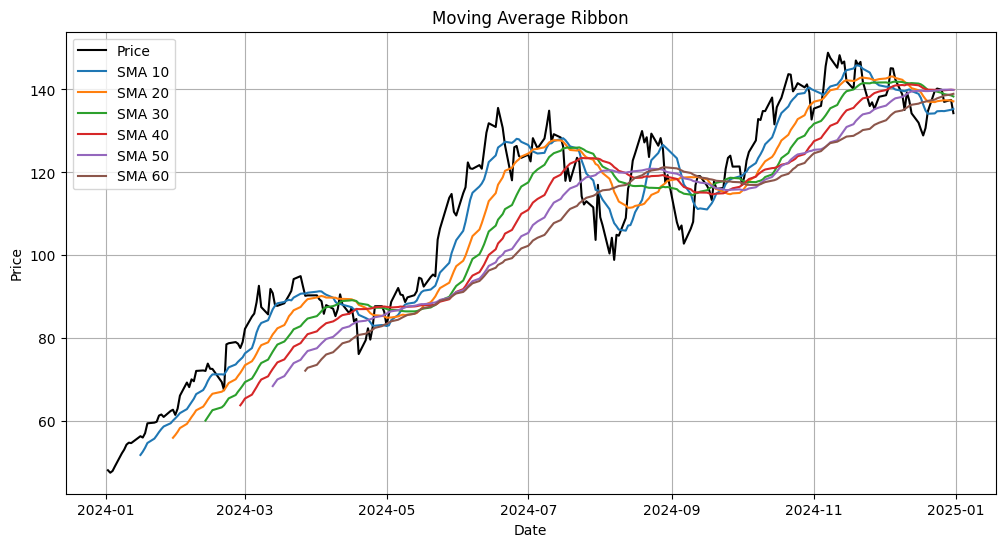

In [4]:
import yfinance as yf
import matplotlib.pyplot as plt

ticker = "NVDA"
df = yf.Ticker(ticker).history(start="2024-01-1", end="2025-01-1")
df.reset_index(inplace=True)

# Define moving average periods for the ribbon
periods = [10, 20, 30, 40, 50, 60]
for period in periods:
    df[f"SMA_{period}"] = df["Close"].rolling(
        window=period).mean()

# Plot Moving Average Ribbon
plt.figure(figsize=(12, 6))
plt.plot(df["Date"], df["Close"], label="Price", color="black", linewidth=1.5)
for period in periods:
    plt.plot(df["Date"], df[f"SMA_{period}"], label=f"SMA {period}")
plt.title("Moving Average Ribbon")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid()
plt.show()


### Bollinger

In [1]:
import yfinance as yf
import matplotlib.pyplot as plt

ticker = "NVDA"
data = yf.Ticker(ticker).history(start="2024-01-01")

In [2]:
sma_window_length = 20
std_dev_factor = 2
data['SMA'] = data['Close'].rolling(
    window=sma_window_length).mean()
rolling_std = data['Close'].rolling(
    window=sma_window_length).std()
data['rf'] = (rolling_std * std_dev_factor)
data['upper'] =  data['SMA'] + data['rf']
data['lower'] =  data['SMA'] - data['rf']

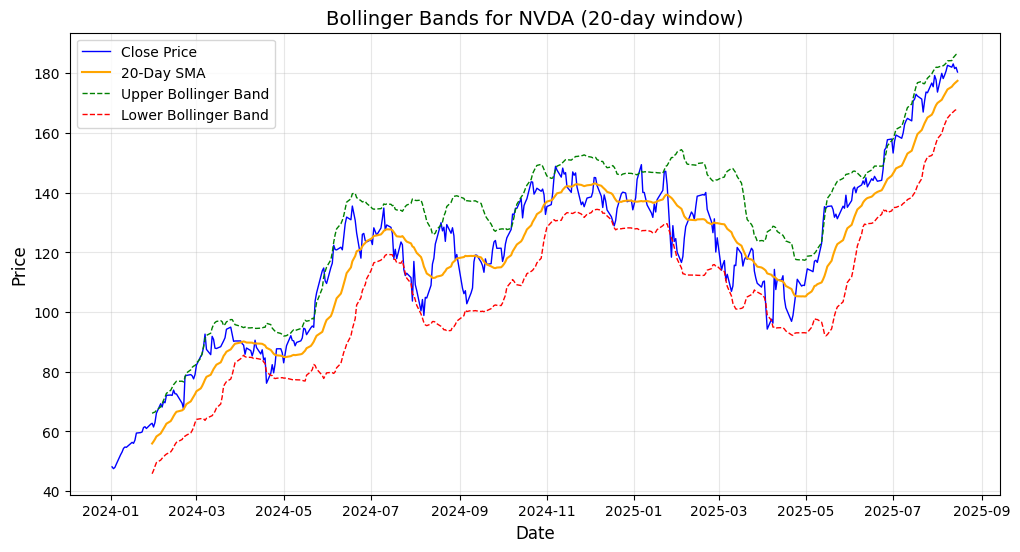

In [3]:
# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Close'], label="Close Price", color="blue", linewidth=1)
plt.plot(data.index, data['SMA'], label=f"{sma_window_length}-Day SMA", color="orange", linewidth=1.5)
plt.plot(data.index, data['upper'], label="Upper Bollinger Band", color="green", linestyle="--", linewidth=1)
plt.plot(data.index, data['lower'], label="Lower Bollinger Band", color="red", linestyle="--", linewidth=1)

# Add labels and legend
plt.title(f"Bollinger Bands for {ticker} (20-day window)", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Price", fontsize=12)
plt.legend()
plt.grid(alpha=0.3)
plt.show()

### Crossover

In [4]:
import yfinance as yf
import matplotlib.pyplot as plt

df = yf.download("SMR", start="2023-01-01")


/var/folders/6g/gq4hv4r53q35rzvjssls_3h00000gn/T/ipykernel_11635/2596577537.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download("SMR", start="2023-01-01")
[*********************100%***********************]  1 of 1 completed


In [5]:
def MACD(df):
    df["EMA12"] = df["Close"].ewm(span=12, adjust=False).mean()
    df["EMA26"] = df["Close"].ewm(span=26, adjust=False).mean()
    df["MCAD"] = df.EMA12 - df.EMA26
    df["signal"] = df["MCAD"].ewm(span=9, adjust=False).mean()

In [6]:
MACD(df)

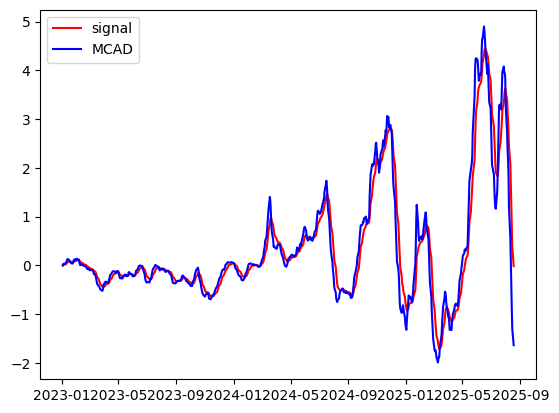

In [7]:
plt.plot(df.signal, label="signal", color="red")
plt.plot(df.MCAD, label="MCAD", color="blue")
plt.legend()
plt.show()

## Ichomoku


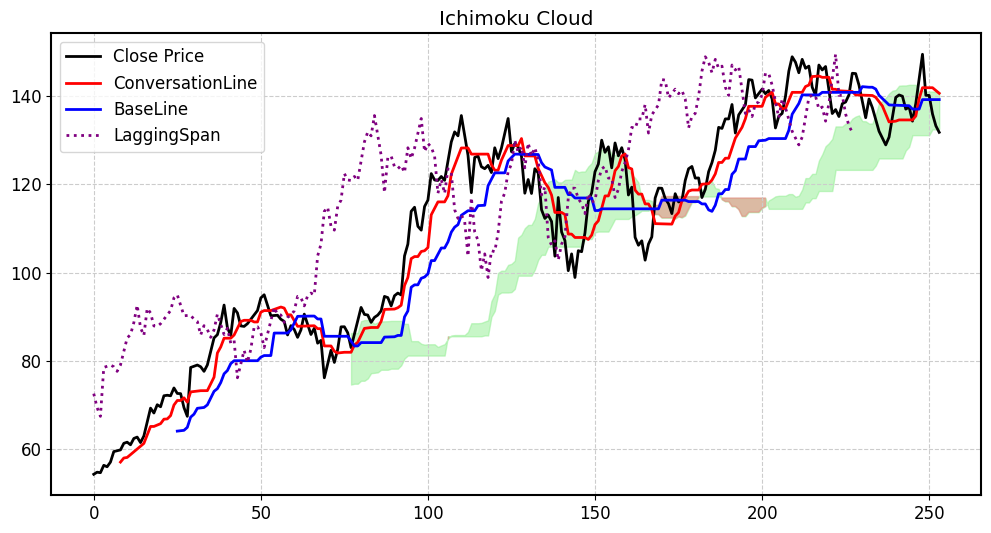

In [8]:
import yfinance as yf
import matplotlib.pyplot as plt
ticker = "NVDA"
data = yf.Ticker(ticker).history(start="2024-01-10", end="2025-01-15")
df = pd.DataFrame(data).dropna()
df.reset_index(inplace=True)

df["ConversationLine"] = (df["Close"].rolling(
    window=9).max() + df["Close"].rolling(
    window=9).min()) / 2    #A
df["BaseLine"] = (df["Close"].rolling(
    window=26).max() + df["Close"].rolling(window=26).min()) / 2    #A
df["SpanA"] = ((df["ConversationLine"]
                + df["BaseLine"]) / 2).shift(26)
df["SpanB"] = ((df["Close"].rolling(
                window=52).max() + df["Close"].rolling(
                window=52).min()) / 2).shift(26)    #A
df["LaggingSpan"] = df["Close"].shift(-26)    #A

plt.figure(figsize=(12, 6))
plt.plot(df.index, df["Close"], label="Close Price", color="black")
plt.plot(df.index, df["ConversationLine"], label="ConversationLine", color="red")
plt.plot(df.index, df["BaseLine"], label="BaseLine", color="blue")
plt.fill_between(df.index, df["SpanA"], df["SpanB"], where=df["SpanA"] >= df["SpanA"], color="lightgreen", alpha=0.5)
plt.fill_between(df.index, df["SpanA"], df["SpanB"], where=df["SpanA"] < df["SpanB"], color="lightcoral", alpha=0.5)
plt.plot(df.index, df["LaggingSpan"], label="LaggingSpan", color="purple", linestyle="dotted")

plt.title("Ichimoku Cloud")
plt.legend()
plt.show()


# other

In [6]:
# other
import pandas as pd
import yfinance as yf
ticker = "PFE"
data = yf.Ticker(ticker).history(start="2020-01-01", end="2025-05-15")
df = pd.DataFrame(data).dropna()

$PFE: possibly delisted; no price data found  (1h 2020-01-01 -> 2025-05-15) (Yahoo error = "1h data not available for startTime=1577854800 and endTime=1747281600. The requested range must be within the last 730 days.")


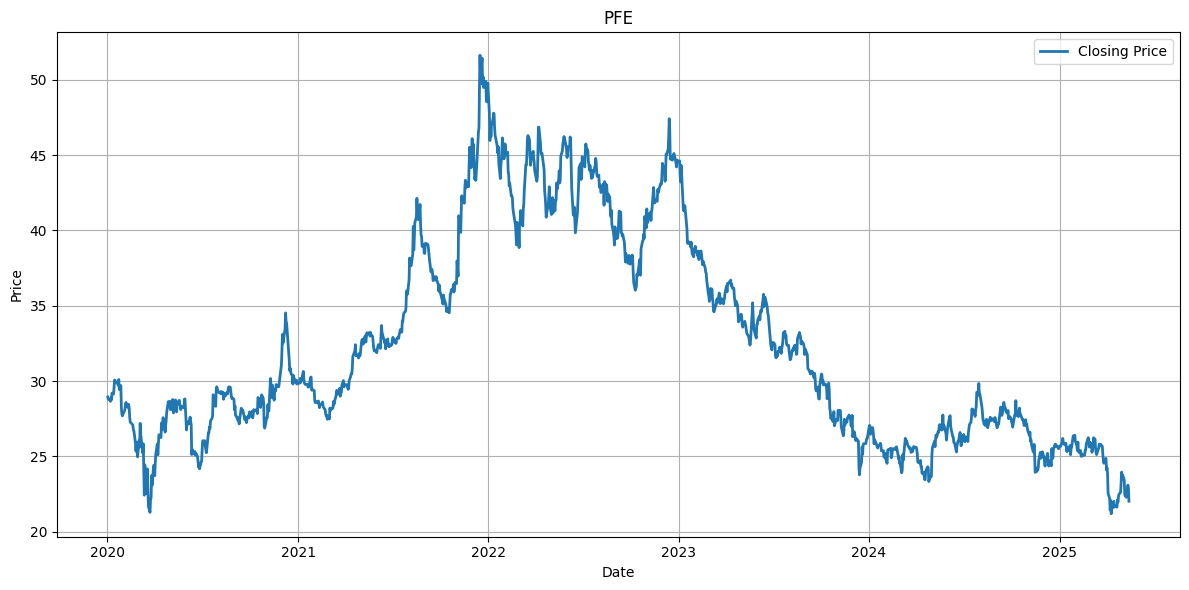

In [2]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(df.index, df["Close"], label="Closing Price", linewidth=2)
plt.title("PFE")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [5]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
def plot(ticker, start, end):
    data = yf.Ticker(ticker).history(start=start, end=end, interval="1d")
    df = pd.DataFrame(data).dropna()
    plt.figure(figsize=(12, 6))
    plt.plot(df.index, df["Close"], label="Closing Price", linewidth=2)
    plt.title(ticker)
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

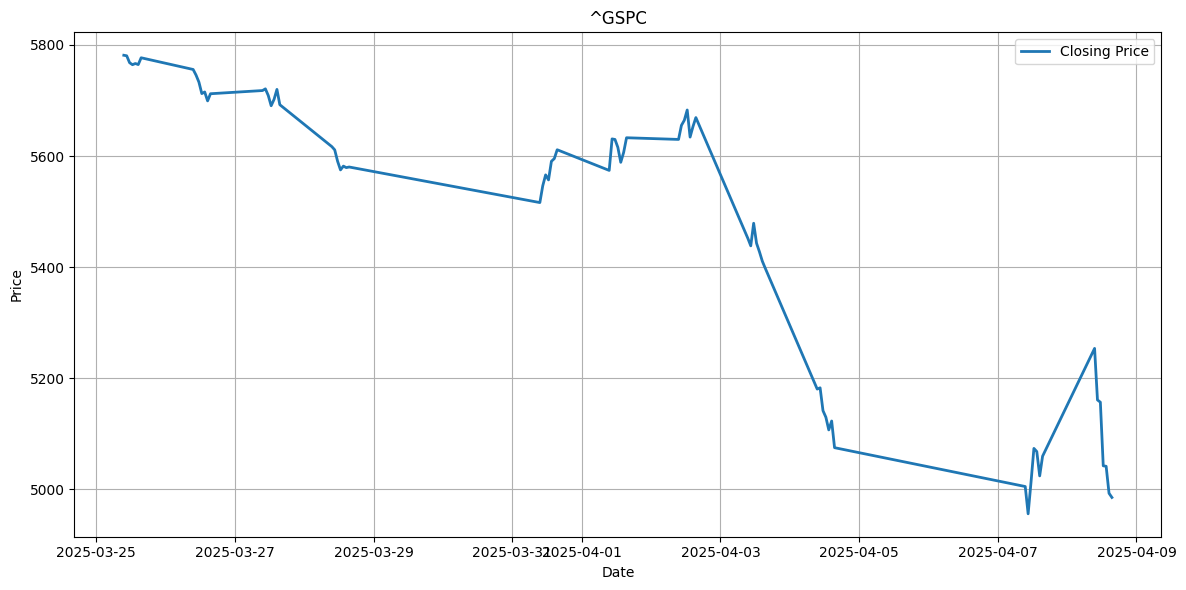

In [22]:
plot("^GSPC", "2025-03-25", end="2025-04-09")

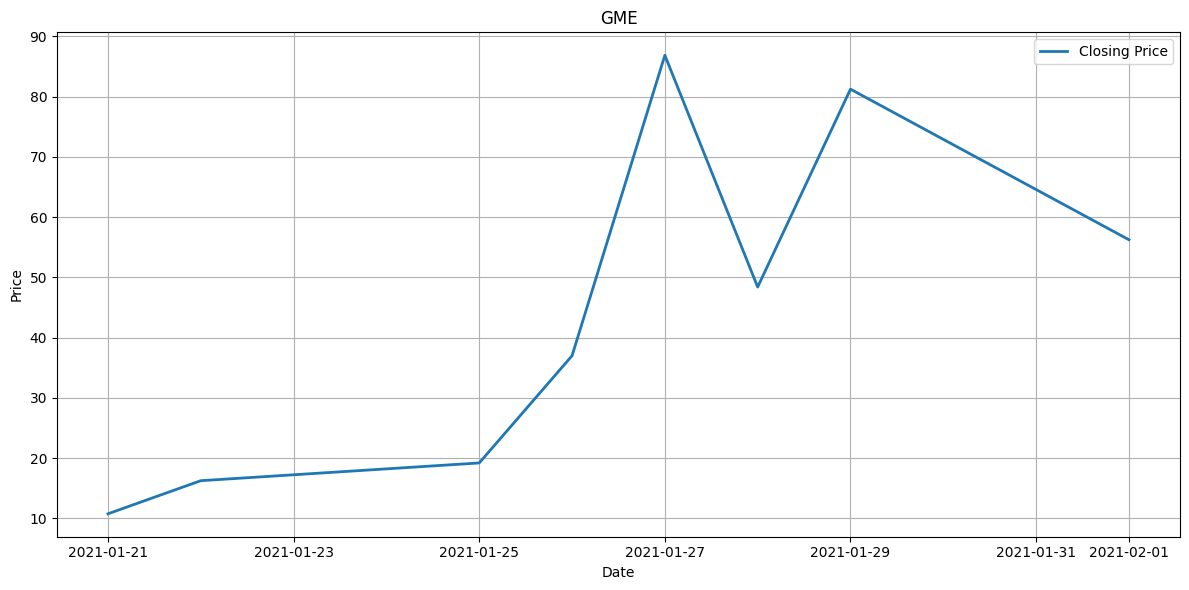

In [25]:
plot("GME", "2021-01-21", end="2021-02-02")

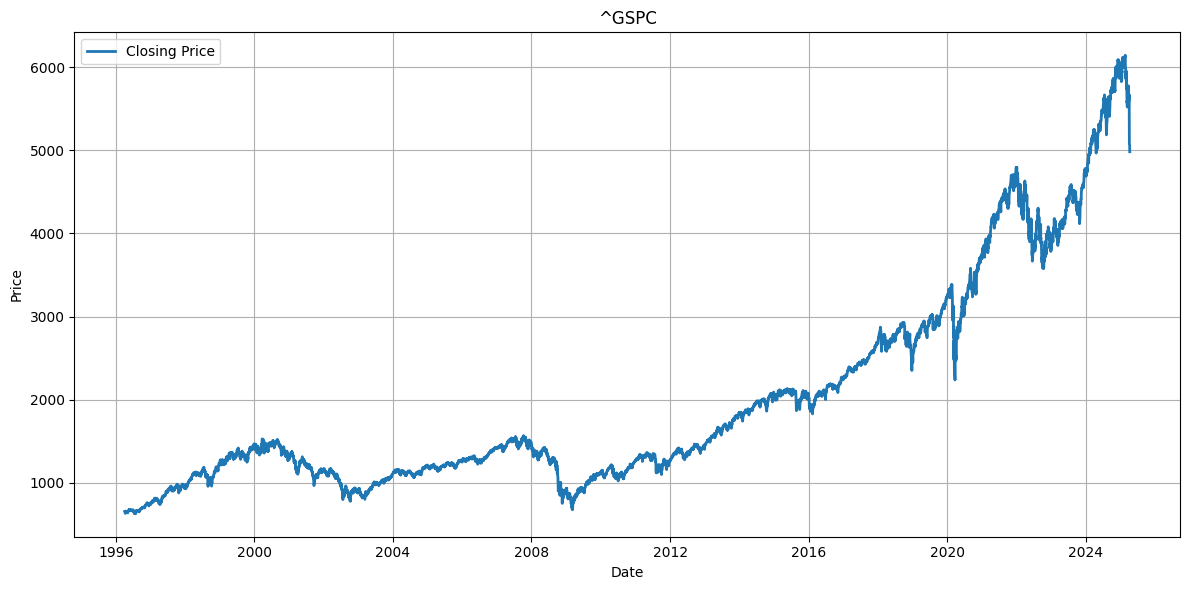

In [26]:
plot("^GSPC", "1996-04-04", end="2025-04-09")

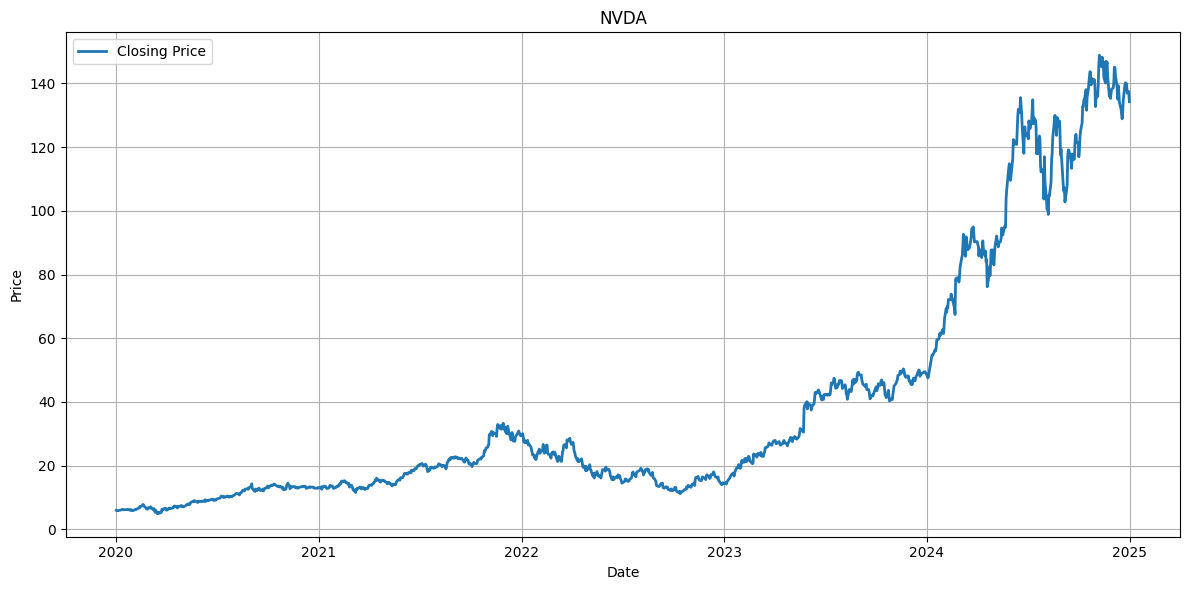

In [27]:
plot("NVDA", "2020-01-01", end="2025-01-01")

In [3]:
plot("PFE", "2020-01-01", end="2025-01-01")

NameError: name 'plot' is not defined

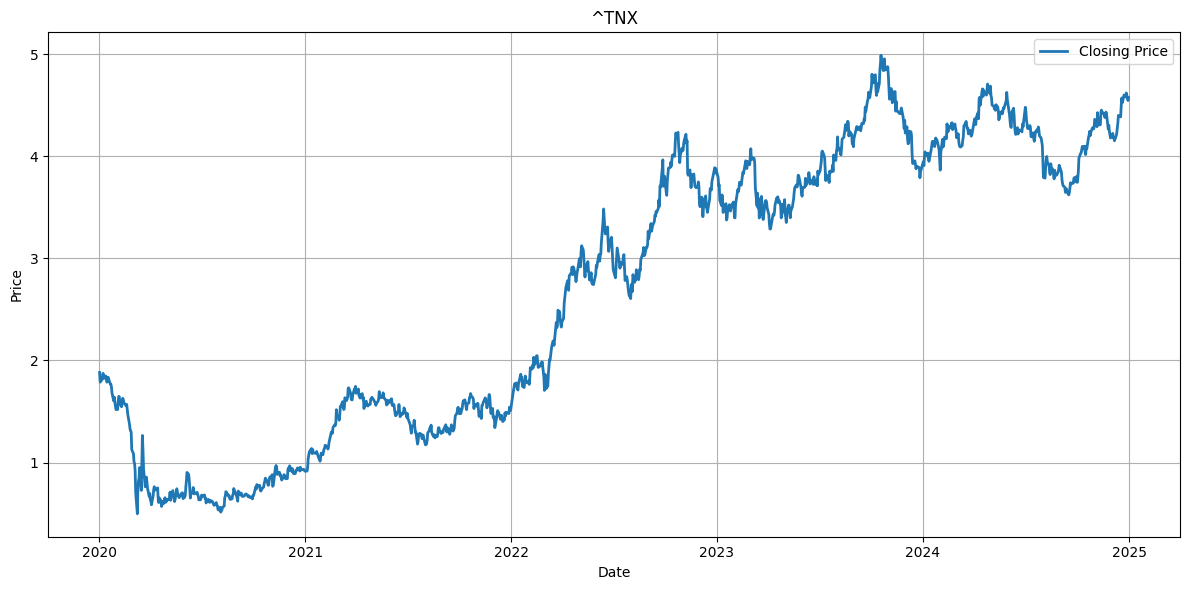

In [8]:
plot("^TNX", "2020-01-01", end="2025-01-01")

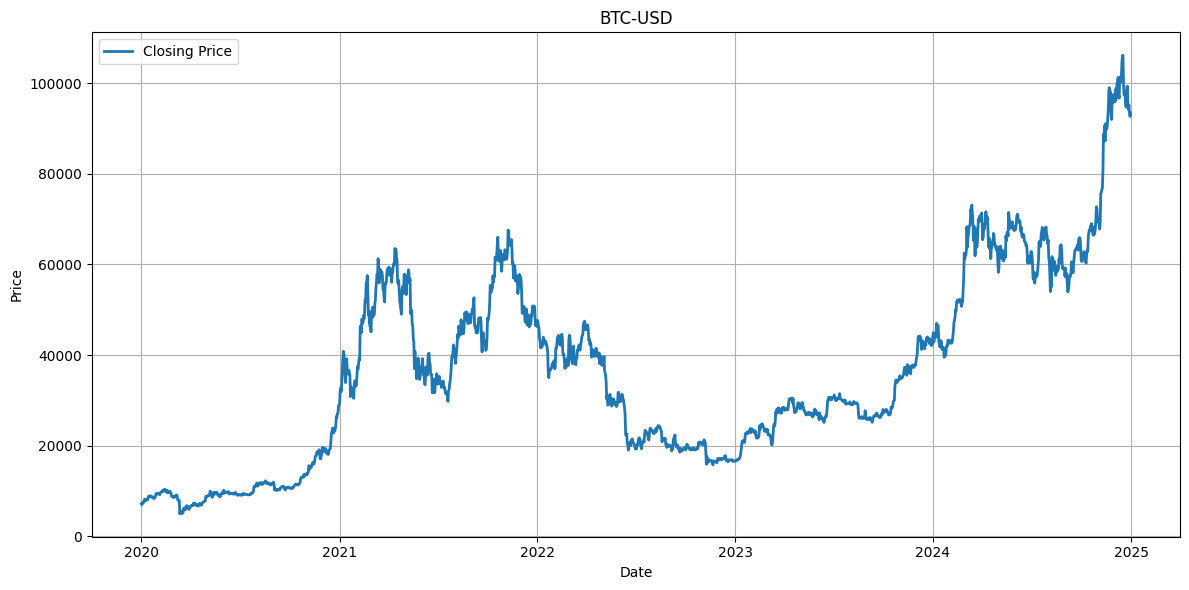

In [6]:
plot("BTC-USD", "2020-01-01", end="2025-01-01")

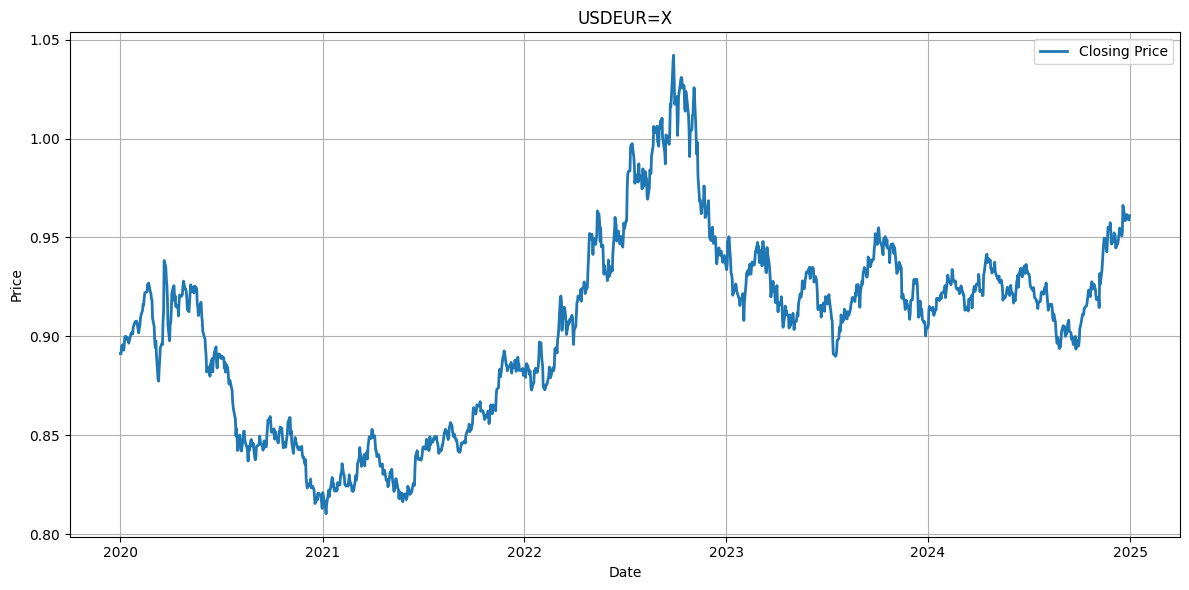

In [9]:
plot("USDEUR=X", "2020-01-01", end="2025-01-01")


In [4]:
df

Date                             P          D       E  \
0     1871.01                          4.44   0.260000    0.40   
1     1871.02                           4.5   0.260000    0.40   
2     1871.03                          4.61   0.260000    0.40   
3     1871.04                          4.74   0.260000    0.40   
4     1871.05                          4.86   0.260000    0.40   
...       ...                           ...        ...     ...   
1850  2025.03                   5683.983333  76.145301  217.05   
1851  2025.04                   5369.495714        NaN     NaN   
1852  2025.05                   5810.919524        NaN     NaN   
1853  2025.06                       5970.37        NaN     NaN   
1854      NaN  June price is June 3rd close        NaN     NaN   

                          CPI     Fraction                    Rate GS10  \
0                   12.464061  1871.041667                         5.32   
1                   12.844641  1871.125000                     5.323333   
2                   13.034972  1871.208333                     5.326667   
3                   12.559226  1871.291667                         5.33   
4                   12.273812  1871.375000                     5.333333   
...                       ...          ...                          ...   
1850                  319.799  2025.208333                         4.28   
1851                  320.795  2025.291667                         4.28   
1852                  321.293  2025.375000                         4.42   
1853                  321.542  2025.458333                         4.46   
1854  May/June CPI estimaated          NaN  June GS10 is June 3rd value   

            Price   Dividend       Price.1  ...       CAPE  Unnamed: 13  \
0      114.541036   6.707358  1.145410e+02  ...        NaN          NaN   
1      112.649234   6.508622  1.131916e+02  ...        NaN          NaN   
2      113.717822   6.413587  1.148024e+02  ...        NaN          NaN   
3      121.353738   6.656534  1.230711e+02  ...        NaN          NaN   
4      127.319383   6.811325  1.296968e+02  ...        NaN          NaN   
...           ...        ...           ...  ...        ...          ...   
1850  5714.962739  76.560316  3.840243e+06  ...  34.784109          NaN   
1851  5381.999068        NaN  3.616504e+06  ...  32.620075          NaN   
1852  5815.422949        NaN  3.907749e+06  ...  35.189554          NaN   
1853  5970.370000        NaN  4.011868e+06  ...  36.062473          NaN   
1854          NaN        NaN           NaN  ...        NaN          NaN   

        TR CAPE  Unnamed: 15     Yield   Returns  Returns.1  Real Return  \
0           NaN          NaN       NaN  1.004177   1.000000     0.130609   
1           NaN          NaN       NaN  1.004180   0.974424     0.130858   
2           NaN          NaN       NaN  1.004183   0.964209     0.130951   
3           NaN          NaN       NaN  1.004185   1.004919     0.122056   
4           NaN          NaN       NaN  1.004188   1.032591     0.122638   
...         ...          ...       ...       ...        ...          ...   
1850  37.347878          NaN  0.016749  1.003567  39.625790          NaN   
1851  34.972420          NaN  0.018768  0.992343  39.643654          NaN   
1852  37.702133          NaN  0.014765  1.000482  39.279111          NaN   
1853  38.612281          NaN  0.013397       NaN  39.267627          NaN   
1854        NaN          NaN       NaN       NaN        NaN          NaN   

      Real Return.1  Returns.2  
0          0.092504   0.038106  
1          0.094635   0.036224  
2          0.096186   0.034765  
3          0.090972   0.031084  
4          0.089488   0.033150  
...             ...        ...  
1850            NaN        NaN  
1851            NaN        NaN  
1852            NaN        NaN  
1853            NaN        NaN  
1854            NaN        NaN  

[1855 rows x 22 columns]

In [5]:
df_cape

Empty DataFrame
Columns: [CAPE]
Index: []

In [18]:
df_cape = df[['Date', 'CAPE']].copy()


In [14]:
df_cape

Date       CAPE
0     1871.01        NaN
1     1871.02        NaN
2     1871.03        NaN
3     1871.04        NaN
4     1871.05        NaN
...       ...        ...
1850  2025.03  34.784109
1851  2025.04  32.620075
1852  2025.05  35.189554
1853  2025.06  36.062473
1854      NaN        NaN

[1855 rows x 2 columns]

0      1871-01-01
1      1871-02-01
2      1871-03-01
3      1871-04-01
4      1871-05-01
          ...    
1850   2025-03-01
1851   2025-04-01
1852   2025-05-01
1853   2025-06-01
1854          NaT
Name: Date, Length: 1855, dtype: datetime64[ns]

In [15]:
df_cape['Date'] = pd.to_datetime(df_cape['Date'], format='%Y.%m', errors='coerce')

In [21]:
pd.to_datetime(df_cape['Date'], format='%Y.%m', errors='coerce')

0      NaT
1      NaT
2      NaT
3      NaT
4      NaT
        ..
1850   NaT
1851   NaT
1852   NaT
1853   NaT
1854   NaT
Name: Date, Length: 1855, dtype: datetime64[ns]

# Bollinger bands

In [ ]:
import yfinance as yf
import matplotlib.pyplot as plt

ticker = "NVDA"
data = yf.Ticker(ticker).history(start="2024-01-01")

In [ ]:
sma_window_length = 20
std_dev_factor = 2
data['SMA'] = data['Close'].rolling(window=sma_window_length).mean()
rolling_std = data['Close'].rolling(window=sma_window_length).std()
data['rf'] = (rolling_std * std_dev_factor)
data['upper'] =  data['SMA'] + data['rf']
data['lower'] =  data['SMA'] - data['rf']

In [ ]:
# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Close'], label="Close Price", color="blue", linewidth=1)
plt.plot(data.index, data['SMA'], label=f"{sma_window_length}-Day SMA", color="orange", linewidth=1.5)
plt.plot(data.index, data['upper'], label="Upper Bollinger Band", color="green", linestyle="--", linewidth=1)
plt.plot(data.index, data['lower'], label="Lower Bollinger Band", color="red", linestyle="--", linewidth=1)

# Add labels and legend
plt.title(f"Bollinger Bands for {ticker} (20-day window)", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Price", fontsize=12)
plt.legend()
plt.grid(alpha=0.3)
plt.show()